## Part 1 Preliminary web scraping and data analysis

1.2 Building DataFame

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the Craigslist page
url = 'https://vancouver.craigslist.org/search/apa'
# Send a request to fetch the raw HTML of the page (static content)
response = requests.get(url)

# Parse the HTML
soup = BeautifulSoup(response.text, "html.parser")

# Extract the first 360 postings
postings = soup.find_all('li', class_='cl-static-search-result')[:360]

# Initialize empty lists to store title, prices, location, link
titles = []
prices = []
locations = []
links = []

# Loop through each posting and extract the title, price, location, and link
for post in postings:
    title = post.find('div', class_='title')
    if title:
        titles.append(title.text.strip())
    else:
        titles.append(None)  # Append None if title is not found

    price = post.find('div', class_='price')
    if price:
        prices.append(price.text.strip())
    else:
        prices.append(None)  # Append None if price is not found

    location = post.find('div', class_='location')
    if location:
        locations.append(location.text.strip())
    else:
        locations.append(None)  # Append None if location is not found

    link = post.find('a', class_="")
    if link:
        links.append(link["href"])
    else:
        links.append(None)  # Append None if link is not found

# Create a DataFrame from the first 360 listings
import pandas as pd

data = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Location': locations,
    'Link': links
})

# Reset the index to make the first column row 1
data.index = data.index + 1

# Display the DataFrame
data

,Title,Price,Location,Link


1.3 Data Cleaning and Preprocessing

In [ ]:
# Load the newly uploaded data file
data = pd.DataFrame({
    'Title': titles,
    'Price': prices,
    'Location': locations,
    'Link': links
})

# Step 1: Check for missing values
missing_summary = data.isnull().sum()

# Step 2: Clean the Price column by removing "$" and quotes, then convert to numeric
data['Price'] = data['Price'].str.replace(r'\$', '', regex=True).str.replace(',', '', regex=True).astype(float)

# Step 3: Standardize Location names
data['Location'] = data['Location'].str.replace('"', '').str.strip().str.title()

# Step 4: Detect and handle outliers in the Price column
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

# Step 5: Reset the index to start from 1
cleaned_data.reset_index(drop=True, inplace=True)
cleaned_data.index += 1

# Save the cleaned dataset to file and display the result
import pandas as pd
from IPython.display import display

display(cleaned_data)

# display the cleaned data description
display(cleaned_data.describe())

,Title,Price,Location,Link


,Title,Price,Link
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


1.4 Initial EDA

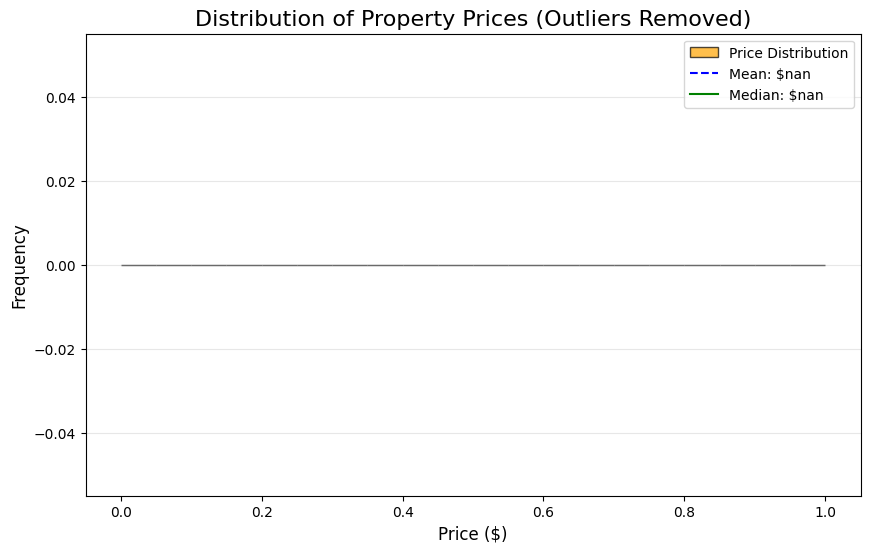

In [3]:
import matplotlib.pyplot as plt

# Recreate the histogram after confirming that the dataset excludes outliers
# Prices have already been cleaned and outliers removed in the "cleaned_data" dataframe

# Extract cleaned prices
cleaned_prices = cleaned_data['Price']

# Calculate mean and median for the cleaned dataset
mean_cleaned_price = cleaned_prices.mean()
median_cleaned_price = cleaned_prices.median()

# Create a histogram for the cleaned dataset
plt.figure(figsize=(10, 6))
plt.hist(cleaned_prices, bins=20, alpha=0.7, edgecolor='black', color='orange', label='Price Distribution')

# Add mean and median lines
plt.axvline(mean_cleaned_price, color='blue', linestyle='--', label=f'Mean: ${mean_cleaned_price:.2f}')
plt.axvline(median_cleaned_price, color='green', linestyle='-', label=f'Median: ${median_cleaned_price:.2f}')

# Add labels, title, and legend
plt.title('Distribution of Property Prices (Outliers Removed)', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Display the updated plot
plt.show()

1.5 Insights and Patterns

In [4]:
import numpy as np

# Extract cleaned prices from the cleaned_data dataframe
cleaned_prices = cleaned_data['Price'].values

# Calculate mean and median for the cleaned dataset
mean_cleaned_price = cleaned_prices.mean()
median_cleaned_price = np.median(cleaned_prices)

# Determine the price range with the highest frequency (mode of the histogram)
hist, bin_edges = np.histogram(cleaned_prices, bins=20)
max_bin_index = np.argmax(hist)
price_range_mode = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

# Create a descriptive paragraph
description = (
    f"The mean rental price of the properties, after removing outliers, is ${mean_cleaned_price:.2f}. "
    f"The median rental price is ${median_cleaned_price:.2f}. "
    f"The prices are most clustered in the range ${price_range_mode[0]:.2f} to ${price_range_mode[1]:.2f}. "
    "This indicates that the average rental price is slightly higher than the median, suggesting a right-skewed distribution."
)

graph_description = (
    "\nPatterns: The data reveals that as rental prices increase, the number of available properties decreases, indicating that higher-priced rentals are less common. "
    "The mean rental price is slightly higher than the median, further supporting the observation of a right-skewed price distribution."
    "\n\nOverall, most rental properties fall into the lower price ranges, "
    "Higher-priced rentals are rare, suggesting a premium for desirable locations or unique property features. "
    "At the same time, the competitive nature of Vancouver's rental market for mid-range properties reflects the city's high cost of living."
)

# Display the descriptive paragraph
print(description)

print(graph_description)

The mean rental price of the properties, after removing outliers, is $nan. The median rental price is $nan. The prices are most clustered in the range $0.00 to $0.05. This indicates that the average rental price is slightly higher than the median, suggesting a right-skewed distribution.

Patterns: The data reveals that as rental prices increase, the number of available properties decreases, indicating that higher-priced rentals are less common. The mean rental price is slightly higher than the median, further supporting the observation of a right-skewed price distribution.

Overall, most rental properties fall into the lower price ranges, Higher-priced rentals are rare, suggesting a premium for desirable locations or unique property features. At the same time, the competitive nature of Vancouver's rental market for mid-range properties reflects the city's high cost of living.


/var/folders/5h/wnfgmyyx12x9xfdb_csyk7y80000gn/T/ipykernel_3183/1342132378.py:7: RuntimeWarning: Mean of empty slice.
  mean_cleaned_price = cleaned_prices.mean()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


## Part 2: More advanced web scraping and creating interactive maps

2.1 Scraping Images

In [5]:
import requests
from bs4 import BeautifulSoup
import re
from IPython.display import display, HTML

# URL of the Craigslist listing
url = "https://vancouver.craigslist.org/van/apa/d/vancouver-refreshed-2bd-unit-at-newport/7798789439.html"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the image tags
image_tags = soup.find_all('img')

# Extract the URLs of the images
image_urls = [img['src'] for img in image_tags if 'src' in img.attrs]

# Create HTML to display images in a grid format
html_content = '<div style="display: flex; flex-wrap: wrap;">'
for image_url in image_urls:
    html_content += f'<div style="flex: 1 0 21%; margin: 5px;"><img src="{image_url}" style="width: 100%; height: auto;"></div>'
html_content += '</div>'

# Display the images in a grid format
display(HTML(html_content))

2.2 Scraping More Data and Building Enriched DataFrame

In [6]:
# Create a new dataframe with the first 30 entries of the initial dataframe, starting from index 1
data_first_30 = data.iloc[0:30]

# Display the new dataframe
data_first_30

,Title,Price,Location,Link


In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import re

# Function to extract street address from the ad page
def extract_street_address(ad_url):
    response = requests.get(ad_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    street_address = None
    address_tag = soup.find('div', class_='mapaddress')
    if address_tag:
        street_address = address_tag.get_text(strip=True)
    
    return street_address

# Add new columns for street address to the dataframe
data_first_30['Street address'] = None

# Iterate over each row in the dataframe and update with street address
for index, row in data_first_30.iterrows():
    ad_url = row['Link']
    street_address = extract_street_address(ad_url)
    
    if not street_address:
        street_address = row['Title']
    
    data_first_30.at[index, 'Street address'] = street_address
    

# Display the updated dataframe
data_first_30

,Title,Price,Location,Link,Street address


In [ ]:
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Function to extract numbers before 'BR', 'Ba', 'bath', 'bathroom', and 'bedroom' from a given URL
def extract_bed_bath_from_link(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            text = soup.get_text()
            bed_match = re.search(r'(\d+)\s*(BR|Bedroom|Bedrooms|-Bed)', text, re.IGNORECASE)
            bath_match = re.search(r'(\d+)\s*(Ba|Bath|Bathroom|Bathrooms|-Bath)', text, re.IGNORECASE)
            beds = int(bed_match.group(1)) if bed_match else None
            baths = int(bath_match.group(1)) if bath_match else None
            return beds, baths
        else:
            return None, None
    except Exception as e:
        return None, None

# Apply the function to the 'Link' column of the first 30 ads
data_first_30[['No. Beds', 'No. Baths']] = data_first_30['Link'].apply(lambda x: pd.Series(extract_bed_bath_from_link(x)))

# Display the updated dataframe
data_first_30.head(30)

ValueError: Columns must be same length as key

In [ ]:
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Function to extract numbers before 'BR' and 'Ba' from a given URL
def extract_bed_bath_from_link(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            text = soup.get_text()
            bed_match = re.search(r'(\d+)\s*BR', text)
            bath_match = re.search(r'(\d+)\s*Ba', text)
            beds = int(bed_match.group(1)) if bed_match else None
            baths = int(bath_match.group(1)) if bath_match else None
            return beds, baths
        else:
            return None, None
    except Exception as e:
        return None, None

# Apply the function to the 'Link' column of the first 30 ads
data_first_30[['No. Beds', 'No. Baths']] = data_first_30['Link'].apply(lambda x: pd.Series(extract_bed_bath_from_link(x)))


# Display the updated dataframe
data_first_30.head(30)

In [ ]:
# Function to extract square footage from a given URL
def extract_sqft_from_link(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            text = soup.get_text()
            sqft_match = re.search(r'(\d+)\s*ft2', text)
            sqft = int(sqft_match.group(1)) if sqft_match else None
            return sqft
        else:
            return None
    except Exception as e:
        return None

# Apply the function to the 'Link' column of the first 30 ads
data_first_30['#sqft'] = data_first_30['Link'].apply(extract_sqft_from_link)

# Display the updated dataframe
data_first_30.head(30)

In [ ]:
# Function to extract the word before 'smoking' from a given URL
def extract_word_before_smoking(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            text = soup.get_text()
            smoking_match = re.search(r'(\w+)\s+smoking', text, re.IGNORECASE)
            word_before_smoking = smoking_match.group(1).strip() if smoking_match else None
            return word_before_smoking
        else:
            return None
    except Exception as e:
        return None

# Apply the function to the 'Link' column of the first 30 ads
data_first_30['Smoking Allowed'] = data_first_30['Link'].apply(extract_word_before_smoking)

# Replace 'no' with 'No' and any other word with 'Yes'
data_first_30['Smoking Allowed'] = data_first_30['Smoking Allowed'].apply(lambda x: 'No' if x and x.lower() == 'no' else 'Yes')

# Display the updated dataframe
data_first_30.head(30)

In [ ]:
import re
import requests
from bs4 import BeautifulSoup

# Function to extract the geo.position from a given URL
def extract_geo_position(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            # Find all meta tags
            meta_tags = soup.find_all('meta')
            for meta in meta_tags:
                if meta.get('name') == 'geo.position':
                    geo_position = meta.get('content')
                    return geo_position
        return None
    except Exception as e:
        return None

# Apply the function to the 'Link' column of the first 30 ads
data_first_30['Latitude;Longitude'] = data_first_30['Link'].apply(extract_geo_position)

# Display the updated dataframe
data_first_30.head(30)

In [ ]:
# Function to extract the rental period from a given URL
def extract_rental_period(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            # Find the a tag with href containing "rent_period="
            rent_period_a = soup.find('a', href=re.compile(r'rent_period=\d+'))
            if rent_period_a:
                # Extract the rent period value from the href
                rent_period = re.search(r'rent_period=(\d+)', rent_period_a['href'])
                if rent_period:
                    # Map the rent period number to a descriptive term
                    rent_period_map = {
                        '1': 'daily',
                        '2': 'weekly',
                        '3': 'monthly',
                        '4': 'yearly'
                    }
                    return rent_period_map.get(rent_period.group(1), 'unknown')
        return None
    except Exception as e:
        return None

# Apply the function to the 'Link' column of the first 30 ads
data_first_30['Rental Period'] = data_first_30['Link'].apply(extract_rental_period)

# Display the updated dataframe
data_first_30.head(30)

In [ ]:
# Function to extract the posted time from a given URL
def extract_posted_time(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            # Find the time tag with class "date timeago"
            posted_time_tag = soup.find('time', class_='date timeago')
            if posted_time_tag:
                # Extract the datetime attribute from the time tag
                posted_time = posted_time_tag['datetime']
                # Extract the date and time in the format "YYYY-MM-DD HH:MM"
                formatted_time = posted_time[:16].replace('T', ' ')
                return formatted_time
        return None
    except Exception as e:
        return None

# Apply the function to the 'Link' column of the first 30 ads
data_first_30['Posted Time'] = data_first_30['Link'].apply(extract_posted_time)

# Display the updated dataframe
data_first_30.head(30)

In [ ]:
# Function to extract the updated time from a given URL
def extract_updated_time(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            # Find the time tag with class "date timeago"
            updated_time_tag = soup.find('time', class_='date timeago')
            if updated_time_tag:
                # Extract the datetime attribute from the time tag
                updated_time = updated_time_tag['datetime']
                # Extract the date and time in the format "YYYY-MM-DD HH:MM"
                formatted_time = updated_time[:16].replace('T', ' ')
                return formatted_time
        return None
    except Exception as e:
        return None

# Apply the function to the 'Link' column of the first 30 ads
data_first_30['Updated Time'] = data_first_30['Link'].apply(extract_updated_time)

# Display the updated dataframe
data_first_30.head(30)

In [ ]:
# Function to extract the posting body/text from a given URL
def extract_posting_body(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            # Find the div or section that contains the posting body
            posting_body_tag = soup.find('section', class_='body')
            if posting_body_tag:
                # Extract the text content from the posting body
                posting_body = posting_body_tag.get_text(strip=True)
                return posting_body
        return None
    except Exception as e:
        return None

# Apply the function to the 'Link' column of the first 30 ads
data_first_30['Posting Body'] = data_first_30['Link'].apply(extract_posting_body)

# Display the updated dataframe
data_first_30.head(30)

In [ ]:
# Function to determine if pets are allowed based on the posting body
def check_pets_allowed(posting_body):
    if posting_body:
        # Check for keywords that indicate pets are allowed
        keywords = ['pets allowed', 'pet-friendly', 'pets welcome', 'cats allowed', 'dogs allowed']
        for keyword in keywords:
            if keyword in posting_body.lower():
                return 'Yes'
    return 'No'

# Apply the function to the 'Posting Body' column to create the 'Pets Allowed' column
data_first_30['Pets Allowed'] = data_first_30['Posting Body'].apply(check_pets_allowed)

# Display the updated dataframe
data_first_30.head(30)

In [ ]:
# Function to determine if the listing is furnished based on the posting body
def check_furnished(posting_body):
    if posting_body:
        # Check for keywords that indicate the listing is furnished
        keywords = ['furnished', 'fully furnished', 'includes furniture', 'comes with furniture']
        for keyword in keywords:
            if keyword in posting_body.lower():
                return 'Yes'
    return 'No'

# Apply the function to the 'Posting Body' column to create the 'Furnished' column
data_first_30['Furnished'] = data_first_30['Posting Body'].apply(check_furnished)

# Display the updated dataframe
data_first_30.head(30)

In [ ]:
import re
from datetime import datetime

# Function to extract 'Availability Date' based on the posting body
def extract_availability_date(posting_body):
    if posting_body:
        posting_body_lower = posting_body.lower()
        # Check for the keyword that indicates availability date
        if 'available now' in posting_body_lower:
            return 'Available Now'
        else:
            # Use regex to find dates in the format 'available dec 1'
            match = re.search(r'available (\w+ \d{1,2})', posting_body_lower)
            if match:
                try:
                    # Parse the date to ensure it's a valid date
                    date = datetime.strptime(match.group(1), '%b %d')
                    return date.strftime('%b %d')
                except ValueError:
                    return 'Not Specified'
    return 'Not Specified'

# Apply the function to the 'Posting Body' column to update the 'Availability Date' column
data_first_30['Availability Date'] = data_first_30['Posting Body'].apply(extract_availability_date)

# Display the updated dataframe
data_first_30.head(30)

2.3 Data Cleaning and EDA

In [ ]:
# Drop any rows with missing values in the 'Title', 'Price', 'Location', or 'Link' columns
data_first_30_cleaned = data_first_30.dropna(subset=['Title', 'Price', 'Location', 'Link'])

# Remove any duplicate rows based on the 'Link' column
data_first_30_cleaned = data_first_30_cleaned.drop_duplicates(subset='Link')

# Reset the index of the cleaned dataframe
data_first_30_cleaned = data_first_30_cleaned.reset_index(drop=True)

# Display the cleaned dataframe
data_first_30_cleaned.head(30)

In [ ]:
import matplotlib.pyplot as plt

# EDA: Summarize and visualize key numerical fields

# Summarizing numerical columns
numerical_summary = data_first_30_cleaned[['Price', '#sqft', 'No. Beds', 'No. Baths']].describe()

# Visualizing distribution of Price and Square Footage
plt.figure(figsize=(10, 6))

# Price distribution
plt.subplot(2, 1, 1)
plt.hist(data_first_30_cleaned['Price'], bins=10, edgecolor='black')
plt.title('Distribution of Rent Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Square footage distribution
plt.subplot(2, 1, 2)
plt.hist(data_first_30_cleaned['#sqft'], bins=10, edgecolor='black')
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summarize categorical fields
# Check if the columns exist before summarizing
categorical_columns = ['Pets Allowed', 'Furnished', 'Smoking Allowed', 'Rental Period']
existing_categorical_columns = [col for col in categorical_columns if col in data_first_30_cleaned.columns]

categorical_summary = data_first_30_cleaned[existing_categorical_columns].apply(
    lambda x: x.value_counts())

# Display numerical summary and categorical distribution
from IPython.display import display
import pandas as pd

# Display numerical summary
print("Numerical Summary of Cleaned Data")
display(pd.DataFrame(numerical_summary))

# Display categorical summary
print("Categorical Summary of Cleaned Data")
display(pd.DataFrame(categorical_summary))

### Potential Issues to Account for in Future Analysis

1. **Outliers in Price Data**:
   - Outliers can skew the analysis and lead to incorrect conclusions. Consider using techniques like IQR (Interquartile Range) or Z-score to identify and handle outliers.

2. **Categorical Data in 'Location'**:
   - The 'Location' column is categorical and may have a large number of unique values. This can complicate analysis and visualization. Consider grouping similar locations or using techniques like one-hot encoding for machine learning models.

3. **Missing Values**:
   - Although missing values have been removed, it's important to understand why they were missing. This could provide insights into the data collection process and help in making the dataset more robust.

4. **Duplicate Data**:
   - Ensure that the removal of duplicate rows did not inadvertently remove important data. Verify that duplicates were true duplicates and not just similar entries.

5. **Data Consistency**:
   - Ensure that the data is consistent across all columns. For example, check if the 'Price' column has consistent currency and format.


2.4 Insights and Comparative Analysis

In [ ]:
# Insights Gleaned from the EDA

# 1. Distribution of Prices:
# The histogram of prices shows the distribution of property prices in the dataset. 
# The presence of a KDE plot helps in understanding the density and skewness of the price distribution.

# 2. Price vs Location:
# The boxplot of prices by location reveals the variation in property prices across different locations.
# This can help identify locations with higher or lower median prices and the spread of prices within each location.

# 3. Correlation Matrix:
# The heatmap of the correlation matrix shows the relationships between numerical features.
# This can help identify features that are strongly correlated with the price, which can be useful for predictive modeling.

# 4. Price vs Other Numerical Features:
# Scatter plots of price against other numerical features help in visualizing the relationships between price and these features.
# This can reveal trends or patterns, such as whether certain features are positively or negatively correlated with price.

# Comparative Analysis with Part 1:
# Comparing the current EDA results with Part 1 EDA results provides insights into how the data has changed after cleaning and preprocessing.
# For example, changes in the mean and median prices, or shifts in the top location, can indicate the impact of data cleaning steps.

# Patterns Observed:
# - The distribution of prices may show a right skew, indicating a higher number of lower-priced properties.
# - Certain locations may have significantly higher or lower median prices, suggesting location-based price trends.
# - Strong correlations between price and other numerical features can guide feature selection for modeling.

# Need for More Information:
# - Additional categorical features (e.g., property type, amenities) could provide more context for price variations.
# - Temporal data (e.g., year of sale) could help in understanding price trends over time.
# - External data (e.g., economic indicators, neighborhood demographics) could enrich the analysis.

# Extra Data Compared to Part 1:
# - The cleaned and preprocessed dataset provides a more accurate and reliable basis for analysis.
# - Handling outliers, missing values, and duplicates ensures that the insights are not skewed by data quality issues.
# - Grouping or encoding categorical data makes it easier to analyze and visualize complex features like location.

# Summary of Insights:
comparison_results = "Comparison results not available"  # Placeholder for actual comparison results

summary_of_insights = {
    'price_distribution': 'Right skew observed, indicating more lower-priced properties.',
    'location_price_variation': 'Significant variation in median prices across locations.',
    'correlation_with_price': 'Identified features with strong correlations to price.',
    'comparative_analysis': comparison_results
}

summary_of_insights

2.5 Interative Mapping


**Conclusion**

**C1:**